# Fisher's Linear Discriminant

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



In [2]:
tr_data = pd.read_csv("./data/dataset_FLD.csv", header=None).to_numpy()
print(tr_data)
#Normalisation
print('Normalised: ')
minval=np.amin(tr_data,axis=0)     
maxval=np.amax(tr_data,axis=0)

for i in range(0,len(minval)-1):
    tr_data[:,i]=(tr_data[:,i]-minval[i])/(maxval[i]-minval[i])

print(tr_data)

[[-6.67241846 -1.20619835 -1.08104986  0.        ]
 [ 1.67559763  0.61499432 -0.97160014  0.        ]
 [-4.03905804  0.33510238  0.54461753  1.        ]
 ...
 [-0.81442967 -0.6939448   0.87677634  1.        ]
 [-0.32512155 -0.75902371  1.29977242  1.        ]
 [-1.50343056 -0.26945838 -1.12438972  0.        ]]
Normalised: 
[[0.16387052 0.28961785 0.1481351  0.        ]
 [0.60206189 0.59265696 0.17781883 0.        ]
 [0.30209687 0.54608407 0.58903042 1.        ]
 ...
 [0.47135916 0.37485477 0.67911482 1.        ]
 [0.49704318 0.36402591 0.79383508 1.        ]
 [0.43519317 0.4454876  0.13638095 0.        ]]


## Data for three-dimensional scattered points

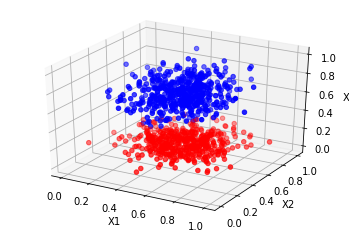

In [3]:
fig = plt.figure()
ax = plt.axes(projection='3d')

zdata = tr_data[:,2]
ydata = tr_data[:,1]
xdata = tr_data[:,0]

colors = ['red', 'blue']
ax.scatter3D(xdata, ydata, zdata, c=tr_data[:,3], cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()

## Separating positive and negative points

In [4]:
N1 = 500
N2 = 500
n = 3

pos_data = np.empty([N1, n])
neg_data = np.empty([N2, n])

i=0
j=0

for row in tr_data:
    if(row[3] == 0):
        pos_data[[i],] = row[0:3]
        i += 1
    else:
        neg_data[[j],] = row[0:3]
        j += 1
print(pos_data.shape)
print(neg_data.shape)

(500, 3)
(500, 3)


## Calculating the Weight vector

In [5]:
M1 = np.mean(pos_data, axis = 0).reshape([1, n])
print(M1)
M2 = np.mean(neg_data, axis = 0).reshape([1, n])
sum1 = 0
for row in pos_data:
    dif = row - M1
    sum1 += np.matmul(dif.T,dif)
sum1 /= N1 
print(sum1)
sum2 = 0
for row in pos_data:
    dif = row - M2
    sum2 += np.matmul(dif.T,dif)
sum2 /= N2 
print(sum2)
Sw = sum1 + sum2 
#print(Sw)

Sw_inv = np.linalg.inv(Sw)
#print(Sw_inv)

w = np.matmul(Sw_inv, (M1-M2).T)
print(w)
w = w/np.linalg.norm(w)
print('unit vector = ',w)

[[0.51947847 0.50752477 0.16872524]]
[[ 2.67128203e-02 -1.80542958e-03  1.68383495e-06]
 [-1.80542958e-03  2.71828748e-02 -4.94330518e-05]
 [ 1.68383495e-06 -4.94330518e-05  1.86960849e-03]]
[[ 0.02675303 -0.0019118   0.00346779]
 [-0.0019118   0.02746426 -0.00921836]
 [ 0.00346779 -0.00921836  0.30063508]]
[[-1.32349697e-03]
 [ 4.40172581e-04]
 [-1.80686708e+00]]
unit vector =  [[-7.32481430e-04]
 [ 2.43610864e-04]
 [-9.99999702e-01]]


## Calculating projected clusters

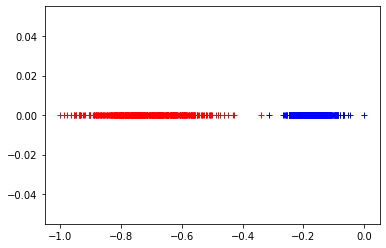

In [6]:

pos_projection = np.matmul(pos_data, w)
neg_projection = np.matmul(neg_data, w)
y1 = np.zeros([N1, 1])
y2 = np.zeros([N2, 1])

fig = plt.figure()
plt.plot(pos_projection, y1, '+', color = 'blue')
plt.plot(neg_projection, y2, '+', color = 'red')
plt.show()

## Calculating Normal Distributions for the clusters

Mean1= -0.16898205925581958  Variance1 = 0.0018696505137315359
Mean2= -0.7155850554292711  Variance2 = 0.011325665353551775
Threshold =  -0.3343810138415524


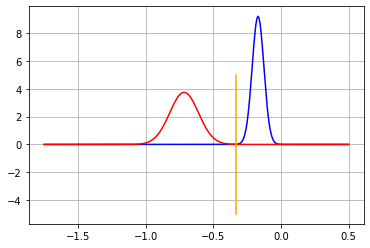

In [7]:
mu1 = np.mean(pos_projection)
var1 = np.var(pos_projection)
print('Mean1=', mu1,' Variance1 =', var1)

mu2 = np.mean(neg_projection)
var2 = np.var(neg_projection)
print('Mean2=', mu2,' Variance2 =', var2)


normx1 = np.linspace(-1.75, 0.5, 300)
norm1 = (1/np.sqrt(2*np.pi*var1)) * np.exp((-(normx1 - mu1)**2)/(2*var1))
normx2 = np.linspace(-1.75, 0.5, 500)
norm2 = (1/np.sqrt(2*np.pi*var2)) * np.exp((-(normx2 - mu2)**2)/(2*var2))

#Calculating intersection of distributions and Threshold
##Solving the Quadratic
a = (1/var2) - (1/var1)
b = (-2*mu2)/var2 + (2*mu1)/var1
c = (mu2**2)/var2 - (mu1**2)/var1 - np.log(var1/var2)

thresh = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
print('Threshold = ', thresh)
thresh_x = np.ones([100, 1])
thresh_x = thresh * thresh_x 
thresh_y = np.linspace(-5, +5, 100 )
fig = plt.figure()
plt.plot(normx1, norm1, color = 'blue')
plt.plot(normx2, norm2, color = 'red')
plt.plot(thresh_x, thresh_y, color = 'orange')
plt.grid()
plt.show()



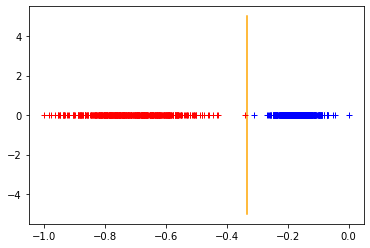

In [8]:
fig = plt.figure()

plt.plot(thresh_x, thresh_y, color = 'orange')
plt.plot(pos_projection, y1, '+', color = 'blue')
plt.plot(neg_projection, y2, '+', color = 'red')

plt.show()

## Plotting the Discriminant Plane in 3D
### By using the plane Eqn

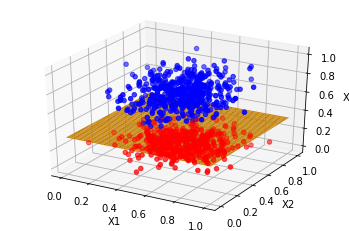

In [9]:

a = w[0]
b = w[1]
c = w[2]
d = thresh
x = np.linspace(0,1,200)
y = np.linspace(0,1,600)

X,Y = np.meshgrid(x,y)
Z = (d - a*X - b*Y) / c

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, Y, Z, color = 'orange')

zdata = tr_data[:,2]
ydata = tr_data[:,1]
xdata = tr_data[:,0]
colors = ['red', 'blue']
ax.scatter3D(xdata, ydata, zdata, c=tr_data[:,3], cmap=matplotlib.colors.ListedColormap(colors))

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
plt.show()